<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importations" data-toc-modified-id="Importations-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importations</a></span><ul class="toc-item"><li><span><a href="#Librairies" data-toc-modified-id="Librairies-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Librairies</a></span></li><li><span><a href="#Importation-des-données" data-toc-modified-id="Importation-des-données-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Importation des données</a></span></li></ul></li><li><span><a href="#Nettoyage-des-données" data-toc-modified-id="Nettoyage-des-données-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Nettoyage des données</a></span><ul class="toc-item"><li><span><a href="#Recupération-des-catégories" data-toc-modified-id="Recupération-des-catégories-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Recupération des catégories</a></span></li><li><span><a href="#Nettoyage-des-descriptions" data-toc-modified-id="Nettoyage-des-descriptions-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Nettoyage des descriptions</a></span></li><li><span><a href="#Encodage-des-catégories" data-toc-modified-id="Encodage-des-catégories-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Encodage des catégories</a></span></li><li><span><a href="#Export-du-dataframe-nettoyé" data-toc-modified-id="Export-du-dataframe-nettoyé-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Export du dataframe nettoyé</a></span></li></ul></li><li><span><a href="#Données-Textuelles" data-toc-modified-id="Données-Textuelles-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Données Textuelles</a></span><ul class="toc-item"><li><span><a href="#Approches-Bag-of-words-:-Count-et-Tf-idf" data-toc-modified-id="Approches-Bag-of-words-:-Count-et-Tf-idf-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Approches Bag-of-words : Count et Tf-idf</a></span></li><li><span><a href="#Approche-Word2Vec-:-embedding-classique" data-toc-modified-id="Approche-Word2Vec-:-embedding-classique-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Approche Word2Vec : embedding classique</a></span><ul class="toc-item"><li><span><a href="#Creation-et-entrainement-du-modèle" data-toc-modified-id="Creation-et-entrainement-du-modèle-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Creation et entrainement du modèle</a></span></li></ul></li><li><span><a href="#Approche-BERT" data-toc-modified-id="Approche-BERT-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Approche BERT</a></span></li><li><span><a href="#Approche-USE" data-toc-modified-id="Approche-USE-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Approche USE</a></span></li></ul></li><li><span><a href="#Features-images" data-toc-modified-id="Features-images-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Features images</a></span><ul class="toc-item"><li><span><a href="#SIFT" data-toc-modified-id="SIFT-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>SIFT</a></span></li><li><span><a href="#CNN" data-toc-modified-id="CNN-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>CNN</a></span></li></ul></li></ul></div>

# Projet 6 : Classifiez automatiquement des biens de consommation


Projet entamé le : 10 Juin 2022

**Problématique** :  Réaliser une étude de faisabilité d'un moteur de classification basé sur une image ou une description 

------------------------------------------

## Importations 


### Librairies 

In [1]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.image import imread
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import numpy as np
import os
from os import listdir
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import cluster
from sklearn import preprocessing
from sklearn import manifold
from sklearn import metrics
from sklearn import decomposition
import time
import tensorflow_hub as hub
import tensorflow as tf
import tensorflow.keras
#from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model


from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16


import transformers
from transformers import *



#from tensorflow import keras


pd.set_option('display.width', 200)
pd.set_option('display.max_colwidth',200)

### Importation des données

In [2]:
df= pd.read_csv("flipkart_com-ecommerce_sample_1050.csv")

df.head(3)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdgthcts?pid=CRNEG7BKMFFYHQ8Z,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...""]",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 Th...",No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""value""=>""Elegance""}, {""key""=>""Designed For"", ""value""=>""Door""}, {""key""=>""Type"", ""value""=>""Eyelet""}, {""key""=>""Model Name"", ""value""=>""Abstract Polyester D..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-towel/p/itmegfzhxbyucwgn?pid=BTWEGFZHGBXPHZUH,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y...""]",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,"Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GS...",No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Washable"", ""value""=>""Yes""}, {""key""=>""Material"", ""value""=>""Cotton""}, {""key""=>""Design"", ""value""=>""Self Design""}, {""key""=>""Brand"", ""value""=>""Sathiyas""}, {""..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-face-towel-set/p/itmeg6shbrpubhca?pid=BTWEG6SHXTDB2A2Y,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA...""]",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,"Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you...",No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"", ""value""=>""Cotton Terry""}, {""key""=>""Design"", ""value""=>""SHUVAM""}, {""key""=>""Brand"", ""value""=>""Eurospa""}, {""key""=>""GSM"", ""value""=>""360""}, {""key""=>""Type"",..."


In [3]:
print(df.shape)

(1050, 15)


<AxesSubplot:title={'center':'Répartition des types de colonnes'}, ylabel='None'>

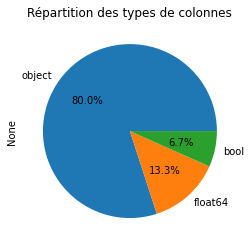

In [4]:
df.dtypes.value_counts().plot(kind='pie',autopct="%1.1f%%", title = "Répartition des types de colonnes")

In [5]:
df.describe()

,retail_price,discounted_price
count,1049.000000,1049.000000
mean,2186.197331,1584.527169
std,7639.229411,7475.099680
min,35.000000,35.000000
25%,555.000000,340.000000
50%,999.000000,600.000000
75%,1999.000000,1199.000000
max,201000.000000,201000.000000


In [6]:
print("Valeurs manquantes (%): ")
print((((df.isna().sum().sum()/df.shape[0])*100).round(2)))
print("Valeurs manquantes par colonnes (%): ")
print((((df.isna().sum()/df.shape[0])*100).round(2)).sort_values(ascending= False))
print("--"*50)
print("Valeurs différentes par variables : ")
for col in df:
    if df[col].nunique() < 30:
        print (f'{col :-<70} {df[col].unique()}')
    else : 
        print(f'{col :-<70} contient {df[col].nunique()} valeurs différentes')
print("--"*50)
print(f"Nombre de doublons : {df.duplicated().sum()}")

Valeurs manquantes (%): 
32.48
Valeurs manquantes par colonnes (%): 
brand                      32.19
retail_price                0.10
discounted_price            0.10
product_specifications      0.10
uniq_id                     0.00
crawl_timestamp             0.00
product_url                 0.00
product_name                0.00
product_category_tree       0.00
pid                         0.00
image                       0.00
is_FK_Advantage_product     0.00
description                 0.00
product_rating              0.00
overall_rating              0.00
dtype: float64
----------------------------------------------------------------------------------------------------
Valeurs différentes par variables : 
uniq_id--------------------------------------------------------------- contient 1050 valeurs différentes
crawl_timestamp------------------------------------------------------- contient 149 valeurs différentes
product_url----------------------------------------------------------- con

## Nettoyage des données


### Recupération des catégories

In [7]:
df.product_category_tree[8].split('["')[1].split(">>")[0]

'Watches '

In [8]:
def recup_cat_niveau_0(data):
    '''
    Fonction qui récupère le premier niveau dans l'arbre de catégories
    '''
    data["category_lvl_0"] = data["product_category_tree"].apply(lambda x: x.split('["')[1].split(">>")[0])
    return data

In [9]:
df = recup_cat_niveau_0(df)

In [10]:
df.category_lvl_0.value_counts()

Home Furnishing                150
Baby Care                      150
Watches                        150
Home Decor & Festive Needs     150
Kitchen & Dining               150
Beauty and Personal Care       150
Computers                      150
Name: category_lvl_0, dtype: int64

<AxesSubplot:title={'center':'Répartition des catégories'}, ylabel='category_lvl_0'>

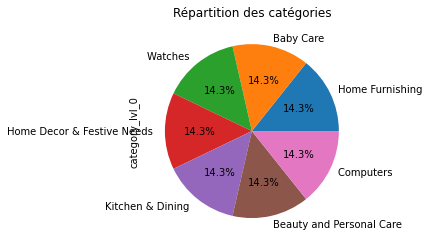

In [11]:
df.category_lvl_0.value_counts().plot(kind='pie',autopct="%1.1f%%", title = "Répartition des catégories")

### Nettoyage des descriptions

In [12]:
def tokenizer_fct(sentence) :
    '''
    Fonction qui retire les caractères spéciaux ( - + / #) d'une phrase 
    Paramètre : sentence ( str)
    Sortie : sentence_clean (str)

    '''
    print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']

def stop_word_filter_fct(list_words) :
    '''
    Fonction qui filtre les stop word anglais, la ponctuation et les mots de plus de 2 lettres
    
    Paramètre : list_words(str)  ensemble de mots, liste 
    Sortie :filtered_w2 (str) liste de mots supérieure à 2 lettres et filtrées
    '''
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

def lower_start_fct(list_words) :
    '''
    Passe en minuscule la liste de mots si elle ne commence pas par @, # ou http
    
    Paramètres : 
        list_words : liste de mots (str)
        
    '''
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
                                       and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

def lemma_fct(list_words) :
    '''
    Donne la base d'un mot
    
    Paramètre : 
        list_words : liste de mots (str)
        
    '''
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

def nettoyage_fct(desc_text) :
    '''
    Nettoie une liste de mots en suivant plusieurs étapes.
    Paramètres : 
        desc_text : str
    '''
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

In [13]:
df_clean = df.copy()
df_clean.description = df_clean.description.apply(lambda x : nettoyage_fct(x))

Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you 

"Get talking with your coffee! Our wide selection of cute and catchy designs means you're sure to find the quote that says what it is, the way it is. And if these mugs bring on the smiles, don't forget to share them. Mugs like these make great gifts! Each mug is beautifully designed with quality ink and attractive graphics, perfect for all around enjoyment." "Express yourself! Our distinctive coffee mugs give you the freedom to broadcast your own special message, from holiday cheer to your love of cupcakes. These affordable mugs are also perfect for gifting, so you can show others just how well you know them. Break out the mugs, and bring on the laughs! Happy sipping!
Rockmantra Fogg Tree Ceramic Mug (5.5 l)
                         Price: Rs. 199
				
Size : 3.5" X 4"
Size : 3.5" X 4"
Rockmantra Red Flowers In Bucket Ceramic Mug (5.5 l)
                         Price: Rs. 199
				
Size : 3.5" X 4"
Size : 3.5" X 4"
Rockmantra Abstracts 16 Ceramic Mug (5.5 l)
                         Pr

This handcrafted elephant is a set of 3 piece elephants made of Chinese Paper Mache art. They have been decorated with enamel paint and lacquer polish. The size of the elephants is in increasing order of 2.5 inch, 3 inch and 3.5 inch. It is an exclusive show piece for your drawing room; sure to be admired by your guests.
King International Ergonomic Design with Long Gripped Handle Rolling Pizza Cutter (Stainless Steel Pack of 1)
                         Price: Rs. 199
				
			"Stop fights among friends over the last slice of pizza using this pizza cutten from Fab Kitchen. The suttle color allows it to blend in perfectly with your other kitchen cutlery. The razor sharp stainless steel blade allows it to instantly cut up food slices. Short Description
* Material: Stainless Steel & Plastic
* Color: Red, White and Steel
* Freezer Safe: Yes
* Dishwasher Safe: Yes
* Pizza Cutter Length: 8 inches (20 cm)
* Quantity: 1 Piece (Pizza Cutter)"
"Stop fights among friends over the last slice of piz

Buy Netgear AC 750 Wi-Fi Range Extender only for Rs. 5999 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guarantee. Free Shipping. Cash On Delivery!
Buy iBall wr7011a only for Rs. 1333 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guarantee. Free Shipping. Cash On Delivery!
Flipkart.com: Buy Envy 1000 Intense,Magnetic Combo Set online only for Rs. 350 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guarantee. Free Shipping. Cash On Delivery!
Flipkart.com: Buy Vincent Valentine Paris Set of Dark Fire & Dark Magic Deodorants Combo Set online only for Rs. 310 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guarantee. Free Shipping. Cash On Delivery!
Buy Netis WF-2301 only for Rs. 5249 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guarantee. Free Shipping. Cash On Delivery!
Flipkart.com: Buy Denver Rage Hamilton Honour Combo Set online only for Rs. 379 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guarante

Maxima 03918CMLY Analog Watch  - For Women - Buy Maxima 03918CMLY Analog Watch  - For Women  03918CMLY Online at Rs.795 in India Only at Flipkart.com. Stainless Steel Back Case, Water Resistant, Deployment Clasp, Golden Strap, Round Dial - Great Discounts, Only Genuine Products, 30 Day Replacement Guarantee, Free Shipping. Cash On Delivery!
Nexus NX_7668 Analog Watch  - For Men - Buy Nexus NX_7668 Analog Watch  - For Men  NX_7668 Online at Rs.999 in India Only at Flipkart.com. - Great Discounts, Only Genuine Products, 30 Day Replacement Guarantee, Free Shipping. Cash On Delivery!
Sonata 8959YL01 Yuva Gold Analog Watch  - For Women - Buy Sonata 8959YL01 Yuva Gold Analog Watch  - For Women  8959YL01 Online at Rs.780 in India Only at Flipkart.com. Round Dial, White and Teal Strap, Water Resistant - Great Discounts, Only Genuine Products, 30 Day Replacement Guarantee, Free Shipping. Cash On Delivery!
Maxima 01433CMGY Gold Analog Watch  - For Men - Buy Maxima 01433CMGY Gold Analog Watch  - 

Buy Galaxy Decorations Polyester Royalblue Plain Eyelet Door Curtain at Rs. 2199 at Flipkart.com. Only Genuine Products. Free Shipping. Cash On Delivery!
Buy Blue Bell Popfun Sipper for Rs.180 online. Blue Bell Popfun Sipper at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee.
Buy Welhouse Cotton Hand & Face Towel Set at Rs. 479 at Flipkart.com. Only Genuine Products. Free Shipping. Cash On Delivery!
Portia Polka Print Trendy Cap - Buy Multicolor Portia Polka Print Trendy Cap For Only Rs. 900 Online in India. Shop Online For Apparels. Huge Collection of Branded Clothes Only at Flipkart.com
RTD Baby Girl's Kurta and Pyjama Set - Buy Yellow RTD Baby Girl's Kurta and Pyjama Set For Only Rs. 1183 Online in India. Shop Online For Apparels. Huge Collection of Branded Clothes Only at Flipkart.com
Buy Ornate 7 W LED Bulb for Rs.209 online. Ornate 7 W LED Bulb at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Da

Buy Fonokase SU100 SU100 USB USB Charger for Rs.480 online. Fonokase SU100 SU100 USB USB Charger at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee.
Memore Portable and Flexible MMULL-White USB Led Light (White)
                         Price: Rs. 195
				
			1. 100% Brand New And High Quality. 2. Perfect Fit For Reading. 3. Light Weight And Durable Cover. 4. Portable And Multiple Choice Of Color. 5. Flexible And Easy Clean. 6. Rated Voltage: 5v 7. Rated Power: 1.2w 8. Size: 170*18.5*9mm 9. Can Be Use On Any Where,Powered By Any Devices With Usb Port 10. Ultra Bright With Low Power Consumption 11. Unique Bendable Design,Also Has Light Weight 12. Material: Silicone
1. 100% Brand New And High Quality. 2. Perfect Fit For Reading. 3. Light Weight And Durable Cover. 4. Portable And Multiple Choice Of Color. 5. Flexible And Easy Clean. 6. Rated Voltage: 5v 7. Rated Power: 1.2w 8. Size: 170*18.5*9mm 9. Can Be Use On Any Where,Powered By A

Key Features of Aster Luxury Arabic Oudh Bathing Bar - Pack of 4 SLES FREE: PHTHALATES FREE,Aster Luxury Arabic Oudh Bathing Bar - Pack of 4 (500 g) Price: Rs. 475 Natural Arabic Oudh Soap This luxurious bathing bar has lovable essence of pure Arabian oudh. You will possibly feel more lively & positive after every bath. Agarwood (oud) calms the body and enhances mental functionally. Oudh calms the body, bringing deep tranquility and relaxation. Antimicrobial properties of oud keep skin germs free. The glycerine based soap revives your skin and makes it soft, supple and smooth. Benefits of Arabic Oudh Soap : • Rejuvenative, Anti-stress properties. • Good for dry skin. • Invigorates your skin health. • Moisturizes and smoothens rough skin. Usage: Firmly hold the aster luxury handmade bathing bar and run all over the wet body. This soap gives good lather that will clean your whole body. Apply lather all over body before showering off. Size: 125 g (4.4 Oz) Coconut Oil, Sorbitol, Castor Oil

In [14]:
df_clean.columns.to_list()
cols_to_drop = ['uniq_id',
                'crawl_timestamp',
                'product_url',
                'product_name',
                'product_category_tree',
                'pid',
                'retail_price',
                'discounted_price',
                'is_FK_Advantage_product',
                'product_rating',
                'overall_rating',
                'brand',
                'product_specifications',]

df_clean.drop(cols_to_drop, axis = 1, inplace = True)

### Encodage des catégories

In [15]:
le = preprocessing.LabelEncoder()
df_clean['label_category'] = le.fit_transform(
    np.array(df_clean['category_lvl_0']))


label = ['0', '1', '2', '3', '4', '5', '6']
for i in range(len(label)):
    df = df_clean.loc[df_clean['label_category'] == i]
    cat = df['category_lvl_0'].iloc[0]
    print('Le label {} correspond à la catégorie {}' .format(i, cat))

Le label 0 correspond à la catégorie Baby Care 
Le label 1 correspond à la catégorie Beauty and Personal Care 
Le label 2 correspond à la catégorie Computers 
Le label 3 correspond à la catégorie Home Decor & Festive Needs 
Le label 4 correspond à la catégorie Home Furnishing 
Le label 5 correspond à la catégorie Kitchen & Dining 
Le label 6 correspond à la catégorie Watches 


### Export du dataframe nettoyé

In [16]:
df_clean.to_csv("data_cleaned.csv")

## Données Textuelles

###  Approches Bag-of-words : Count et Tf-idf

In [17]:
df_clean.head(5)

,image,description,category_lvl_0,label_category
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,key features elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain 213 height pack price 899 this curtain enhances lo...,Home Furnishing,4
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,specifications sathiyas cotton bath towel bath towel red yellow blue bath towel features machine washable yes material cotton design self design general brand sathiyas type bath towel gsm 500 mode...,Baby Care,0
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,key features eurospa cotton terry face towel set size small height inch gsm 360 eurospa cotton terry face towel set piece face towel set assorted price 299 eurospa brings exclusively designed 100 ...,Baby Care,0
3,d4684dcdc759dd9cdf41504698d737d8.jpg,key features santosh royal fashion cotton printed king sized double bedsheet royal bedsheet perfact wedding gifting specifications santosh royal fashion cotton printed king sized double bedsheet b...,Home Furnishing,4
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,key features jaipur print cotton floral king sized double bedsheet 100 cotton jaipur print cotton floral king sized double bedsheet bed sheet pillow cover white price 998 this nice bed sheet made ...,Home Furnishing,4


In [18]:
l_cat = list(df_clean.category_lvl_0.unique())

y_true = df_clean['label_category']

In [19]:
vector = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'description'
vect_fit = vector.fit(df_clean[feat])
tf_vectorizer_fit = vectorizer.fit(df_clean[feat])

vect_transform = vector.transform(df_clean[feat])  
tf_vectorizer_transform = vectorizer.transform(df_clean[feat])  

print(tf_vectorizer_transform.shape)

(1050, 5711)


In [20]:
# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features) :
    time1 = time.time()
    num_labels=len(l_cat)
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_true, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_true, labels, ARI) :
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_true, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    plt.title('Représentation selon les catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation selon les clusters')
    
    plt.show()
    print("ARI : ", ARI)

CountVectorizer : 
-----------------
ARI :  0.3656 time :  11.0


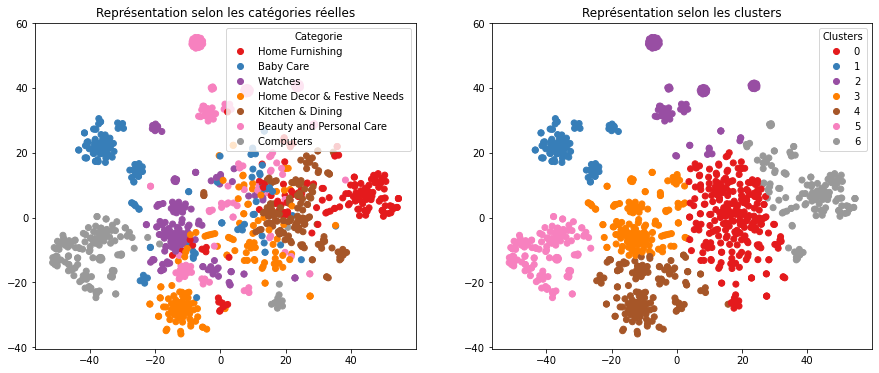

ARI :  0.3656

Tf-idf : 
--------
ARI :  0.5351 time :  9.0


In [21]:
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(vect_transform)
TSNE_visu_fct(X_tsne, y_true, labels, ARI)
print()
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(tf_vectorizer_transform)


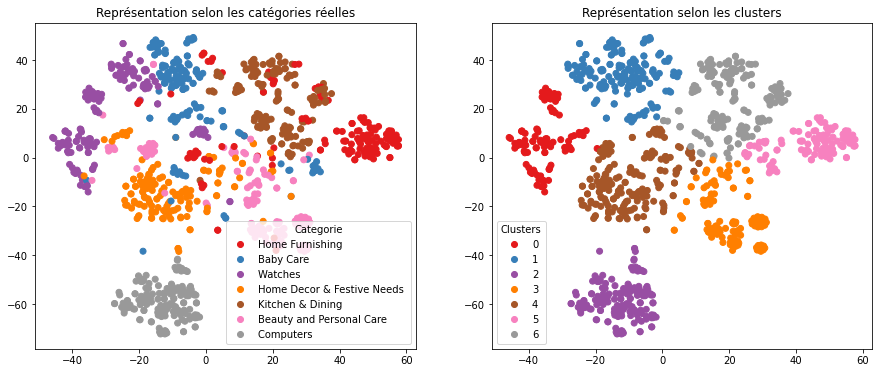

ARI :  0.5351


In [22]:
TSNE_visu_fct(X_tsne, y_true, labels, ARI)

### Approche Word2Vec : embedding classique

In [23]:
import multiprocessing
import gensim
from gensim.models import Word2Vec

cores = multiprocessing.cpu_count() 
print("Nombre de coeurs de l'ordinateur : ", cores )
sentences = df_clean[feat].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]


Nombre de coeurs de l'ordinateur :  4


#### Creation et entrainement du modèle

In [24]:
print("Build & train Word2Vec model ...")
w2v_model = Word2Vec(min_count=3, # Ignores all words with total frequency lower than this, default 5
                     window=7, #The maximum distance between the current and predicted word within a sentence.
                     vector_size=100, # Dimensionality of the feature vectors.
                     epochs= 100,# Number of epochs training over corpus
                     workers=cores-1)
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=100)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 2430
Word2Vec trained


In [25]:
maxlen = max(len(x) for x in sentences)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 100
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i = 0
j = 0
for word, idx in word_index.items():
    i += 1
    if word in w2v_words:
        j += 1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
               embedding_matrix[idx] = model_vectors[word]
word_rate = np.round(j/i,4)

print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)


embeddings = embed_model.predict(x_sentences)
embeddings.shape

Fit Tokenizer ...
Number of unique words: 5099
Create Embedding matrix ...
Word embedding rate :  0.4767
Embedding matrix: (5099, 100)
33/33 [==============================] - 0s 3ms/step


(1050, 100)

In [26]:
ARI, X_tsne, labels = ARI_fct(embeddings)

ARI :  0.3452 time :  8.0


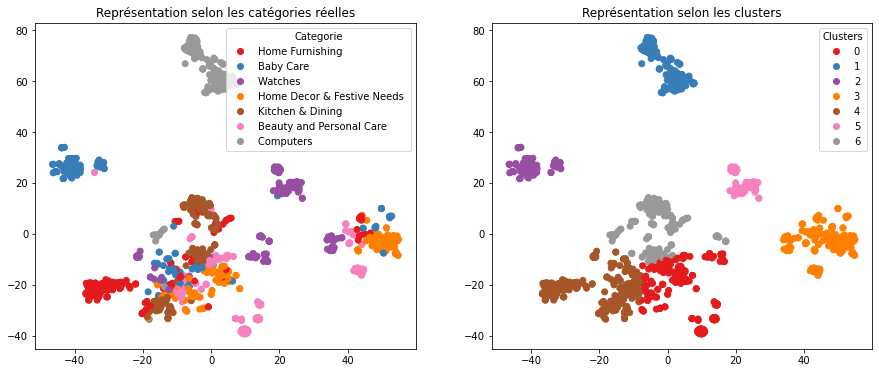

ARI :  0.3452


In [27]:
TSNE_visu_fct(X_tsne, y_true, labels, ARI)

### Approche BERT

In [28]:
os.environ["TF_KERAS"]='1'
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.9.1
2.9.1
Num GPUs Available:  0
True


In [29]:
def featTxt_WE_bert(df_clean):
    
    # Création des phrases
    sentences = df_clean['description'].values
    sentences = [x for x in sentences]
    batch_size = 10
    max_length = 64
    model_type = 'bert-base-uncased'
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()
    model = TFAutoModel.from_pretrained(model_type)

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        
        input_ids = []
        token_type_ids = []
        attention_mask = []

        for sent in sentences[idx:idx+batch_size]:
           

            bert_inp = bert_tokenizer.encode_plus(sent,
                                                  add_special_tokens = True,
                                                  max_length = max_length,
                                                  padding = 'max_length',
                                                  return_attention_mask = True, 
                                                  return_token_type_ids = True,
                                                  truncation = True,
                                                  return_tensors = "tf"
                                                )

            input_ids.append(bert_inp['input_ids'][0])
            token_type_ids.append(bert_inp['token_type_ids'][0])
            attention_mask.append(bert_inp['attention_mask'][0])

        input_ids = np.asarray(input_ids)
        token_type_ids = np.asarray(token_type_ids)
        attention_mask = np.array(attention_mask)
        
        text_preprocessed = {"input_ids" : input_ids, 
                             "attention_mask" : attention_mask, 
                             "token_type_ids" : token_type_ids}
        outputs = model(text_preprocessed)
        last_hidden_states = outputs[0]
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2) 
    
    
    return features_bert

In [30]:
features_bert = featTxt_WE_bert(df_clean)

loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at C:\Users\Dolorès/.cache\huggingface\transformers\3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.20.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file https://huggingface.co/bert-base-uncased

temps traitement :  141.0


In [31]:
ARI, X_tsne, labels = ARI_fct(features_bert)

ARI :  0.3363 time :  8.0


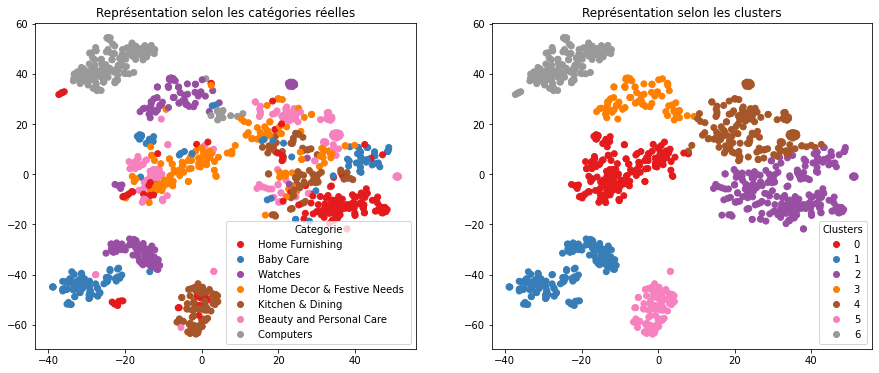

ARI :  0.3363


In [32]:
TSNE_visu_fct(X_tsne, y_true, labels, ARI)

### Approche USE

In [33]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [34]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [35]:
sentences = df_clean['description'].to_list()
batch_size = 10
features_USE = feature_USE_fct(sentences, batch_size)

In [36]:
ARI, X_tsne, labels = ARI_fct(features_USE)

ARI :  0.4091 time :  9.0


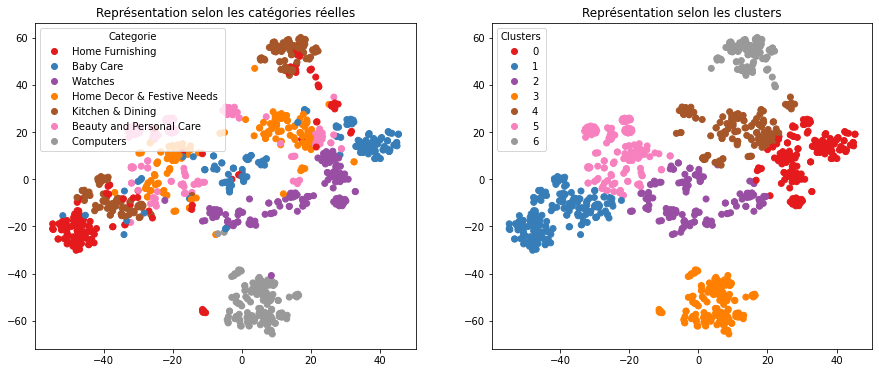

ARI :  0.4091


In [37]:
TSNE_visu_fct(X_tsne, y_true, labels, ARI)

## Features images

In [38]:
# Recupération d'un datset avec image et leur label 

df_image = df_clean[["image", "label_category"]]

In [39]:
path = "../Projet_6/Images/"

list_photos = [file for file in listdir(path)]
print(len(list_photos))

df_image.image = df_image.image.apply(lambda x: path+str(x) )

1050


C:\Users\DOLORS~1\AppData\Local\Temp/ipykernel_13100/880840904.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_image.image = df_image.image.apply(lambda x: path+str(x) )


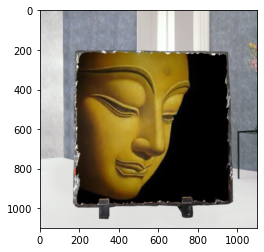

In [40]:
image = imread(path+list_photos[15])
plt.imshow(image)

### SIFT 

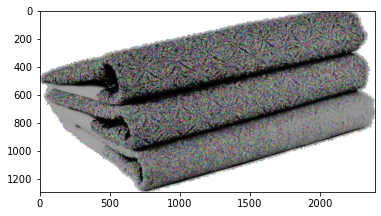

Descripteurs :  (47651, 128)


In [41]:
sift = cv2.xfeatures2d.SIFT_create()
image = cv2.imread(df_image.image[1],0) # convert in gray
image = cv2.equalizeHist(image)   # equalize image histogram
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)

In [42]:
sift_keypoints = []
temps1 = time.time()
sift = cv2.xfeatures2d.SIFT_create(500)
#sample_img = df_image.sample(n = 800)

for image_num in range(df_image.shape[0]):
    image = cv2.imread(df_image.image.iloc[image_num],0)# convert in gray 
    scale = 0.5 # 50% of original image
    width = int(image.shape[1] * scale)
    height = int(image.shape[0] * scale)
    dim = (width, height)    
    image =cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    res = cv2.equalizeHist(image)   # equalize image histogram
    del image
    kp, des = sift.detectAndCompute(res, None)
    del res
    sift_keypoints.append(des)
    del kp,des
    
# liste de descripteurs par image : utilisée pour réaliser les histogrammes par image
sift_keypoints_by_img = np.asarray(sift_keypoints)
# liste de descripteurs pour l'ensemble des images : utilisé pour créer les clusters de descripteurs
sift_keypoints_all = np.concatenate(sift_keypoints_by_img, axis = 0)

print("Nombre de descripteurs : ", sift_keypoints_all.shape)
duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")


# Determination number of clusters
temps2=time.time()
k = int(round(np.sqrt(len(sift_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters = k, init_size = 3*k, random_state = 0)
kmeans.fit(sift_keypoints_all)
duration2=time.time()-temps2
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


Nombre de descripteurs :  (468067, 128)
temps de traitement SIFT descriptor :           177.51 secondes
Nombre de clusters estimés :  684
Création de 684 clusters de descripteurs ...
temps de traitement kmeans :           177.51 secondes


In [43]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")


0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :           226.66 secondes


In [44]:
print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 684)
Dimensions dataset après réduction PCA :  (1050, 502)


In [45]:
tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = df_image["label_category"]
print(df_tsne.shape)

(1050, 3)


In [46]:
ARI_sift, X_tsne_sift, labels = ARI_fct(feat_pca)

ARI :  0.0439 time :  10.0


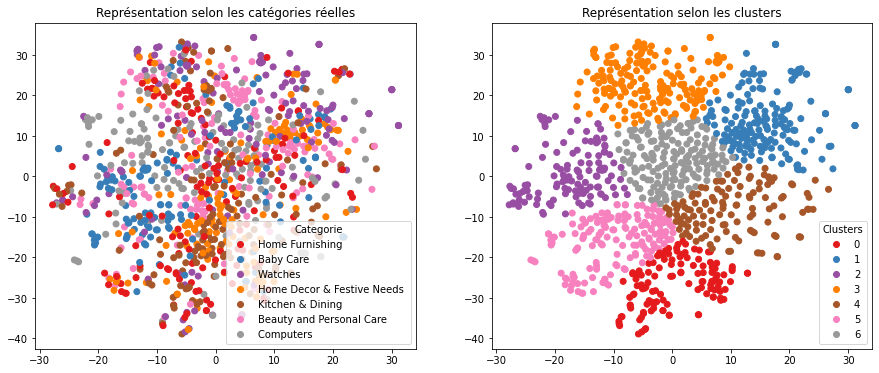

ARI :  0.0439


In [47]:
TSNE_visu_fct(X_tsne_sift, y_true, labels, ARI_sift)

### CNN 

In [48]:
model = VGG16()
# remove the output layer

model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

pict_vectors = []
for image_num in range(df_image.shape[0]):
    # load an image from file
    image = load_img(df_image.image.iloc[image_num], target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)

    # get extracted features
    features = model.predict(image)
    print(features.shape)
    pict_vectors.append(features[0])
    im_feat_cnn = pd.DataFrame(pict_vectors)

1/1 [==============================] - 0s 465ms/step
(1, 4096)
1/1 [==============================] - 0s 205ms/step
(1, 4096)
1/1 [==============================] - 0s 208ms/step
(1, 4096)
1/1 [==============================] - 0s 205ms/step
(1, 4096)
1/1 [==============================] - 0s 205ms/step
(1, 4096)
1/1 [==============================] - 0s 244ms/step
(1, 4096)
1/1 [==============================] - 0s 202ms/step
(1, 4096)
1/1 [==============================] - 0s 207ms/step
(1, 4096)
1/1 [==============================] - 0s 200ms/step
(1, 4096)
1/1 [==============================] - 0s 209ms/step
(1, 4096)
1/1 [==============================] - 0s 208ms/step
(1, 4096)
1/1 [==============================] - 0s 201ms/step
(1, 4096)
1/1 [==============================] - 0s 204ms/step
(1, 4096)
1/1 [==============================] - 0s 216ms/step
(1, 4096)
1/1 [==============================] - 0s 201ms/step
(1, 4096)
1/1 [==============================] - 0s 202ms/step
(1

1/1 [==============================] - 0s 196ms/step
(1, 4096)
1/1 [==============================] - 0s 208ms/step
(1, 4096)
1/1 [==============================] - 0s 194ms/step
(1, 4096)
1/1 [==============================] - 0s 207ms/step
(1, 4096)
1/1 [==============================] - 0s 194ms/step
(1, 4096)
1/1 [==============================] - 0s 208ms/step
(1, 4096)
1/1 [==============================] - 0s 197ms/step
(1, 4096)
1/1 [==============================] - 0s 207ms/step
(1, 4096)
1/1 [==============================] - 0s 200ms/step
(1, 4096)
1/1 [==============================] - 0s 208ms/step
(1, 4096)
1/1 [==============================] - 0s 199ms/step
(1, 4096)
1/1 [==============================] - 0s 207ms/step
(1, 4096)
1/1 [==============================] - 0s 218ms/step
(1, 4096)
1/1 [==============================] - 0s 202ms/step
(1, 4096)
1/1 [==============================] - 0s 198ms/step
(1, 4096)
1/1 [==============================] - 0s 200ms/step
(1

1/1 [==============================] - 0s 206ms/step
(1, 4096)
1/1 [==============================] - 0s 197ms/step
(1, 4096)
1/1 [==============================] - 0s 197ms/step
(1, 4096)
1/1 [==============================] - 0s 198ms/step
(1, 4096)
1/1 [==============================] - 0s 211ms/step
(1, 4096)
1/1 [==============================] - 0s 212ms/step
(1, 4096)
1/1 [==============================] - 0s 207ms/step
(1, 4096)
1/1 [==============================] - 0s 207ms/step
(1, 4096)
1/1 [==============================] - 0s 208ms/step
(1, 4096)
1/1 [==============================] - 0s 213ms/step
(1, 4096)
1/1 [==============================] - 0s 203ms/step
(1, 4096)
1/1 [==============================] - 0s 198ms/step
(1, 4096)
1/1 [==============================] - 0s 203ms/step
(1, 4096)
1/1 [==============================] - 0s 200ms/step
(1, 4096)
1/1 [==============================] - 0s 203ms/step
(1, 4096)
1/1 [==============================] - 0s 205ms/step
(1

1/1 [==============================] - 0s 212ms/step
(1, 4096)
1/1 [==============================] - 0s 199ms/step
(1, 4096)
1/1 [==============================] - 0s 203ms/step
(1, 4096)
1/1 [==============================] - 0s 204ms/step
(1, 4096)
1/1 [==============================] - 0s 198ms/step
(1, 4096)
1/1 [==============================] - 0s 208ms/step
(1, 4096)
1/1 [==============================] - 0s 195ms/step
(1, 4096)
1/1 [==============================] - 0s 204ms/step
(1, 4096)
1/1 [==============================] - 0s 210ms/step
(1, 4096)
1/1 [==============================] - 0s 198ms/step
(1, 4096)
1/1 [==============================] - 0s 211ms/step
(1, 4096)
1/1 [==============================] - 0s 198ms/step
(1, 4096)
1/1 [==============================] - 0s 199ms/step
(1, 4096)
1/1 [==============================] - 0s 208ms/step
(1, 4096)
1/1 [==============================] - 0s 203ms/step
(1, 4096)
1/1 [==============================] - 0s 273ms/step
(1

1/1 [==============================] - 0s 200ms/step
(1, 4096)
1/1 [==============================] - 0s 194ms/step
(1, 4096)
1/1 [==============================] - 0s 206ms/step
(1, 4096)
1/1 [==============================] - 0s 206ms/step
(1, 4096)
1/1 [==============================] - 0s 208ms/step
(1, 4096)
1/1 [==============================] - 0s 199ms/step
(1, 4096)
1/1 [==============================] - 0s 197ms/step
(1, 4096)
1/1 [==============================] - 0s 200ms/step
(1, 4096)
1/1 [==============================] - 0s 200ms/step
(1, 4096)
1/1 [==============================] - 0s 204ms/step
(1, 4096)
1/1 [==============================] - 0s 195ms/step
(1, 4096)
1/1 [==============================] - 0s 197ms/step
(1, 4096)
1/1 [==============================] - 0s 201ms/step
(1, 4096)
1/1 [==============================] - 0s 196ms/step
(1, 4096)
1/1 [==============================] - 0s 200ms/step
(1, 4096)
1/1 [==============================] - 0s 196ms/step
(1

1/1 [==============================] - 0s 202ms/step
(1, 4096)
1/1 [==============================] - 0s 202ms/step
(1, 4096)
1/1 [==============================] - 0s 200ms/step
(1, 4096)
1/1 [==============================] - 0s 210ms/step
(1, 4096)
1/1 [==============================] - 0s 203ms/step
(1, 4096)
1/1 [==============================] - 0s 201ms/step
(1, 4096)
1/1 [==============================] - 0s 198ms/step
(1, 4096)
1/1 [==============================] - 0s 205ms/step
(1, 4096)
1/1 [==============================] - 0s 202ms/step
(1, 4096)
1/1 [==============================] - 0s 216ms/step
(1, 4096)
1/1 [==============================] - 0s 205ms/step
(1, 4096)
1/1 [==============================] - 0s 209ms/step
(1, 4096)
1/1 [==============================] - 0s 195ms/step
(1, 4096)
1/1 [==============================] - 0s 205ms/step
(1, 4096)
1/1 [==============================] - 0s 212ms/step
(1, 4096)
1/1 [==============================] - 0s 199ms/step
(1

C:\Users\Dolorès\AppData\Roaming\Python\Python39\site-packages\PIL\Image.py:3011: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


1/1 [==============================] - 0s 199ms/step
(1, 4096)
1/1 [==============================] - 0s 204ms/step
(1, 4096)
1/1 [==============================] - 0s 204ms/step
(1, 4096)
1/1 [==============================] - 0s 200ms/step
(1, 4096)
1/1 [==============================] - 0s 232ms/step
(1, 4096)
1/1 [==============================] - 0s 201ms/step
(1, 4096)
1/1 [==============================] - 0s 196ms/step
(1, 4096)
1/1 [==============================] - 0s 196ms/step
(1, 4096)
1/1 [==============================] - 0s 210ms/step
(1, 4096)
1/1 [==============================] - 0s 200ms/step
(1, 4096)
1/1 [==============================] - 0s 213ms/step
(1, 4096)
1/1 [==============================] - 0s 198ms/step
(1, 4096)
1/1 [==============================] - 0s 198ms/step
(1, 4096)
1/1 [==============================] - 0s 196ms/step
(1, 4096)
1/1 [==============================] - 0s 249ms/step
(1, 4096)
1/1 [==============================] - 0s 205ms/step
(1

1/1 [==============================] - 0s 216ms/step
(1, 4096)
1/1 [==============================] - 0s 209ms/step
(1, 4096)
1/1 [==============================] - 0s 199ms/step
(1, 4096)
1/1 [==============================] - 0s 206ms/step
(1, 4096)
1/1 [==============================] - 0s 211ms/step
(1, 4096)
1/1 [==============================] - 0s 201ms/step
(1, 4096)
1/1 [==============================] - 0s 205ms/step
(1, 4096)
1/1 [==============================] - 0s 199ms/step
(1, 4096)
1/1 [==============================] - 0s 199ms/step
(1, 4096)
1/1 [==============================] - 0s 215ms/step
(1, 4096)
1/1 [==============================] - 0s 274ms/step
(1, 4096)
1/1 [==============================] - 0s 200ms/step
(1, 4096)
1/1 [==============================] - 0s 209ms/step
(1, 4096)
1/1 [==============================] - 0s 217ms/step
(1, 4096)
1/1 [==============================] - 0s 212ms/step
(1, 4096)
1/1 [==============================] - 0s 272ms/step
(1

1/1 [==============================] - 0s 225ms/step
(1, 4096)
1/1 [==============================] - 0s 204ms/step
(1, 4096)
1/1 [==============================] - 0s 198ms/step
(1, 4096)
1/1 [==============================] - 0s 200ms/step
(1, 4096)
1/1 [==============================] - 0s 198ms/step
(1, 4096)
1/1 [==============================] - 0s 195ms/step
(1, 4096)
1/1 [==============================] - 0s 203ms/step
(1, 4096)
1/1 [==============================] - 0s 197ms/step
(1, 4096)
1/1 [==============================] - 0s 202ms/step
(1, 4096)
1/1 [==============================] - 0s 193ms/step
(1, 4096)
1/1 [==============================] - 0s 199ms/step
(1, 4096)
1/1 [==============================] - 0s 200ms/step
(1, 4096)
1/1 [==============================] - 0s 200ms/step
(1, 4096)
1/1 [==============================] - 0s 196ms/step
(1, 4096)
1/1 [==============================] - 0s 202ms/step
(1, 4096)
1/1 [==============================] - 0s 203ms/step
(1

In [49]:
print("Dimensions dataset avant réduction PCA : ", im_feat_cnn.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca_cnn= pca.fit_transform(im_feat_cnn)
print("Dimensions dataset après réduction PCA : ", feat_pca_cnn.shape)

Dimensions dataset avant réduction PCA :  (1050, 4096)
Dimensions dataset après réduction PCA :  (1050, 803)


In [50]:
ARI_cnn, X_tsne_cnn, labels_cnn = ARI_fct(feat_pca_cnn)

ARI :  0.4956 time :  9.0


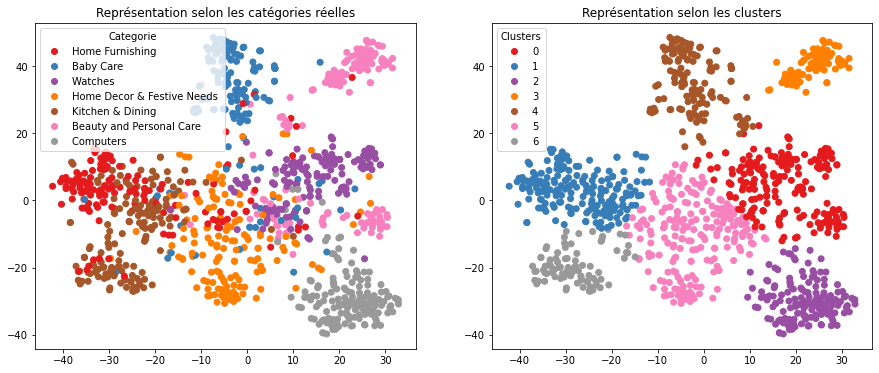

ARI :  0.4956


In [51]:
TSNE_visu_fct(X_tsne_cnn, y_true, labels_cnn, ARI_cnn)